# Household Power Consumption
- Dataset Information

- This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes: 
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

- Variable Information
1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Importing Packages

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading Dataset

In [2]:
df = pd.read_csv('household_power_consumption.txt',delimiter=';',low_memory=False)
df = pd.DataFrame(df)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Converting values to numeric

In [4]:
df_required = df.drop(['Date','Time'],axis=1)
print(df_required.columns)
for cols in df_required.columns:
    df[cols] = pd.to_numeric(df[cols],errors='coerce')
print(df.info())

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB
None


### Describing Dataset

In [5]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### Checking for the Null Values

In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

### Plotting Global Active Power vs Voltage

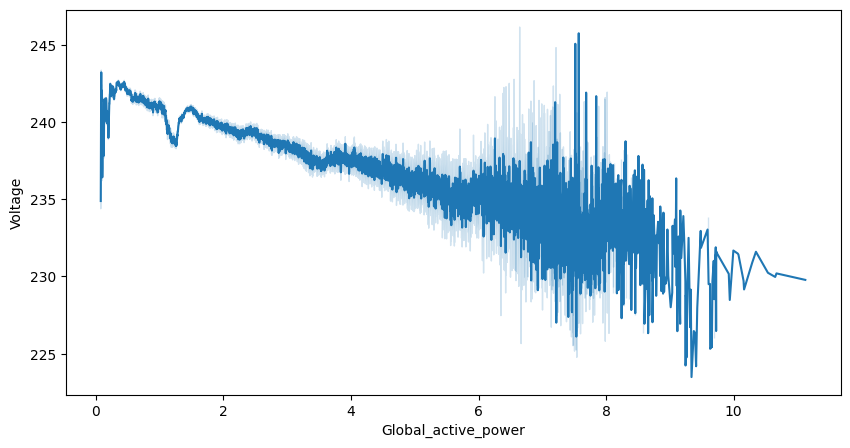

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Global_active_power',y='Voltage')
plt.show()

### Plotting Global Reactive Power vs Voltage

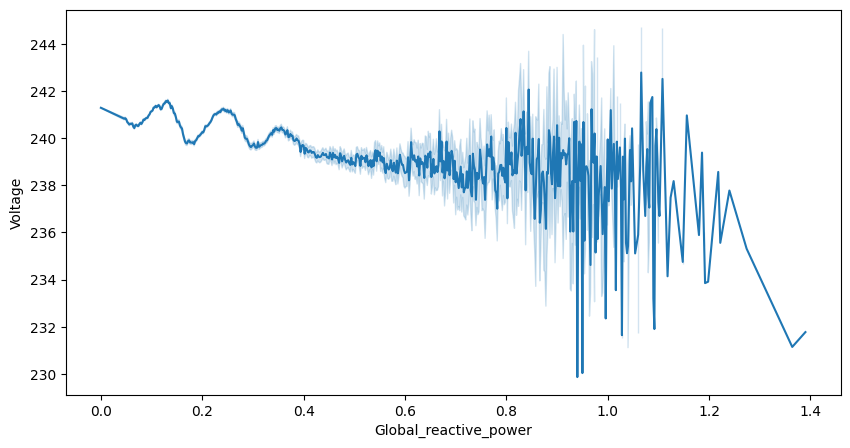

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Global_reactive_power',y='Voltage')
plt.show()

### Plotting Global Active Power vs Global Reactive Power

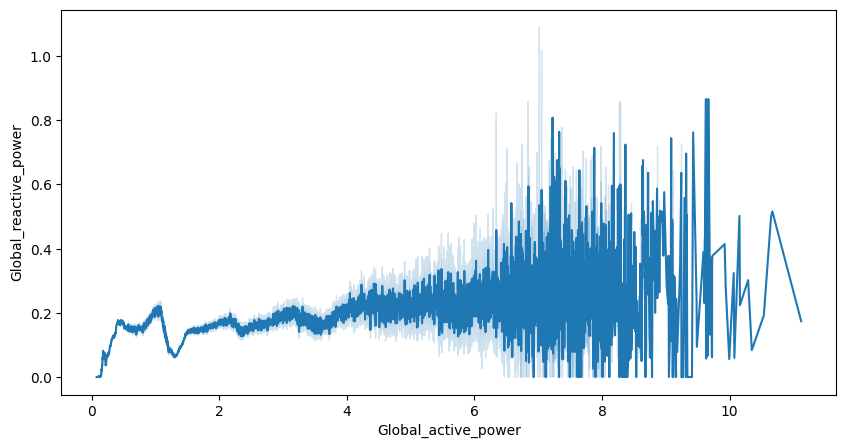

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Global_active_power',y='Global_reactive_power')
plt.show()

### Data Pre-Processing
- Encoding Date & Time
- Converting Features and Label
- Filling Missing values
- Checking for the outliers
- Removing outliers (if requried)
- Train test split

### Encoding Date & Time

In [10]:
def encoding_date_time(date,time):
    print(df[date].head())
    print(df[time].head())

    df[date] = pd.to_datetime(df[date], format='%d/%m/%Y')
    df[time] = pd.to_datetime(df[time], format='%H:%M:%S')
    df['Year'] = df[date].dt.year
    df['Month'] = df[date].dt.month
    df['Date'] = df[date].dt.day
    df['Hour'] = df[time].dt.hour
    df['Minute'] = df[time].dt.minute
    df['Second'] = df[time].dt.second

encoding_date_time('Date','Time')

0    16/12/2006
1    16/12/2006
2    16/12/2006
3    16/12/2006
4    16/12/2006
Name: Date, dtype: object
0    17:24:00
1    17:25:00
2    17:26:00
3    17:27:00
4    17:28:00
Name: Time, dtype: object


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   int64         
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Year                   int64         
 10  Month                  int64         
 11  Hour                   int64         
 12  Minute                 int64         
 13  Second                 int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 221.7 MB


### Converting Feature and label

In [19]:
df_features = df.drop(['Time','Voltage'],axis=1)
df_label = df[['Voltage']]

### Checking for an outliers

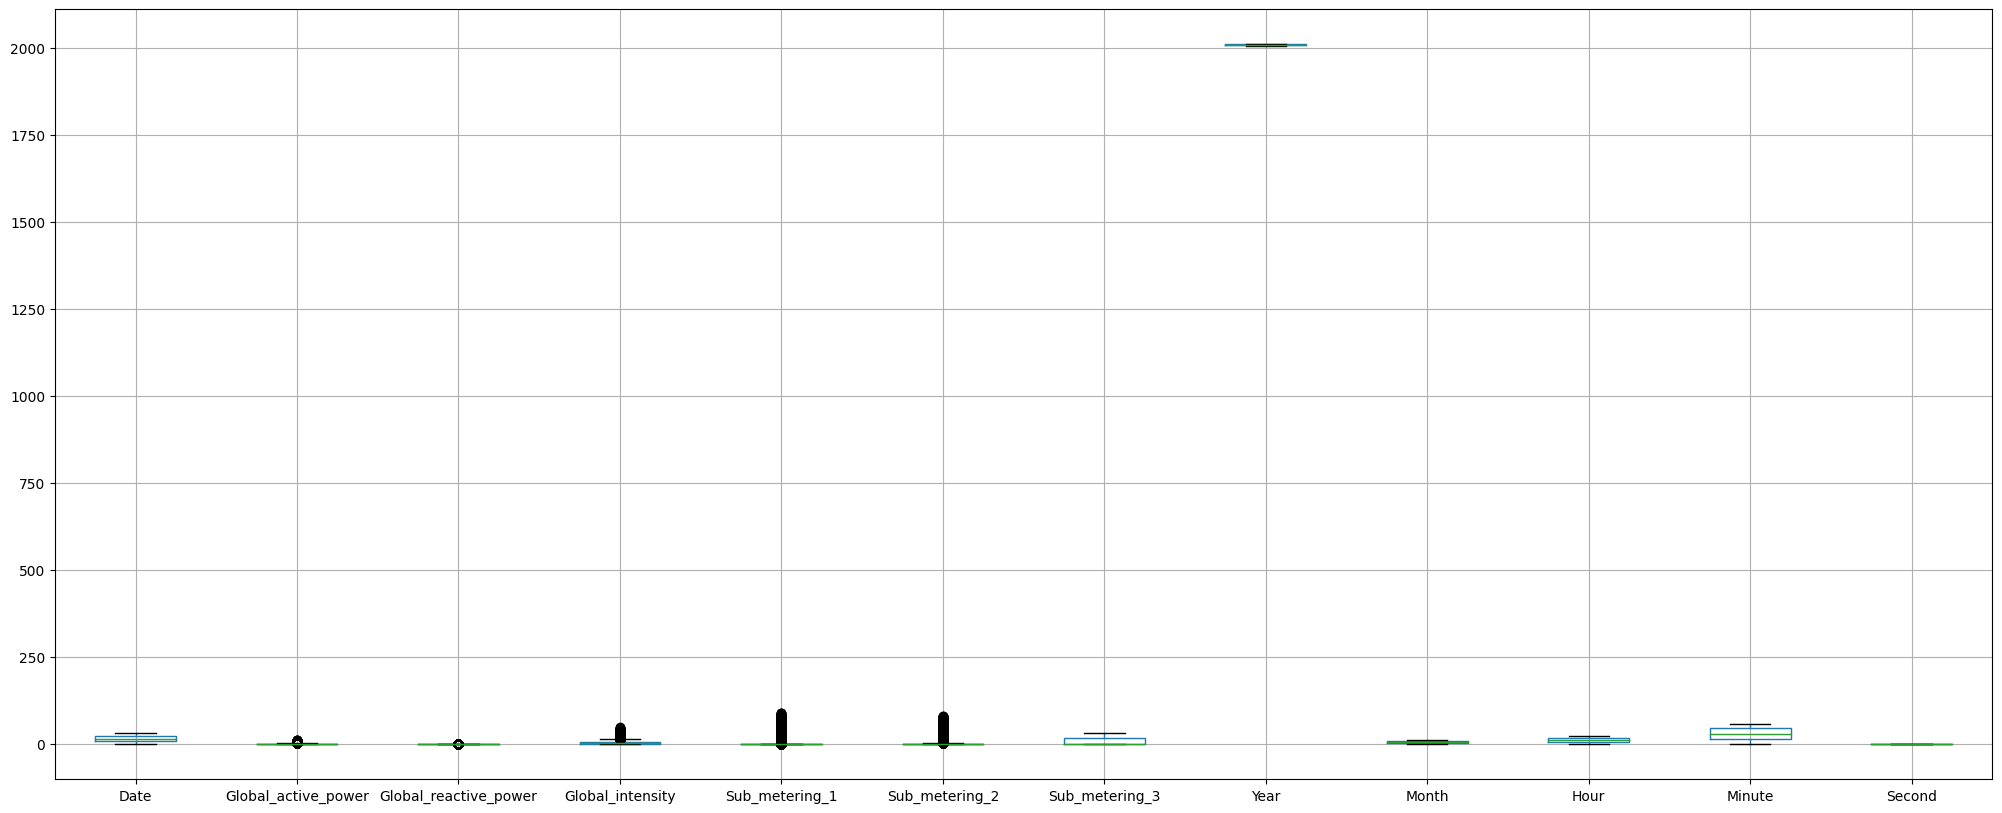

In [27]:
plt.figure(figsize=(25,10))
df_features.boxplot()
plt.show()

### Removing outliers

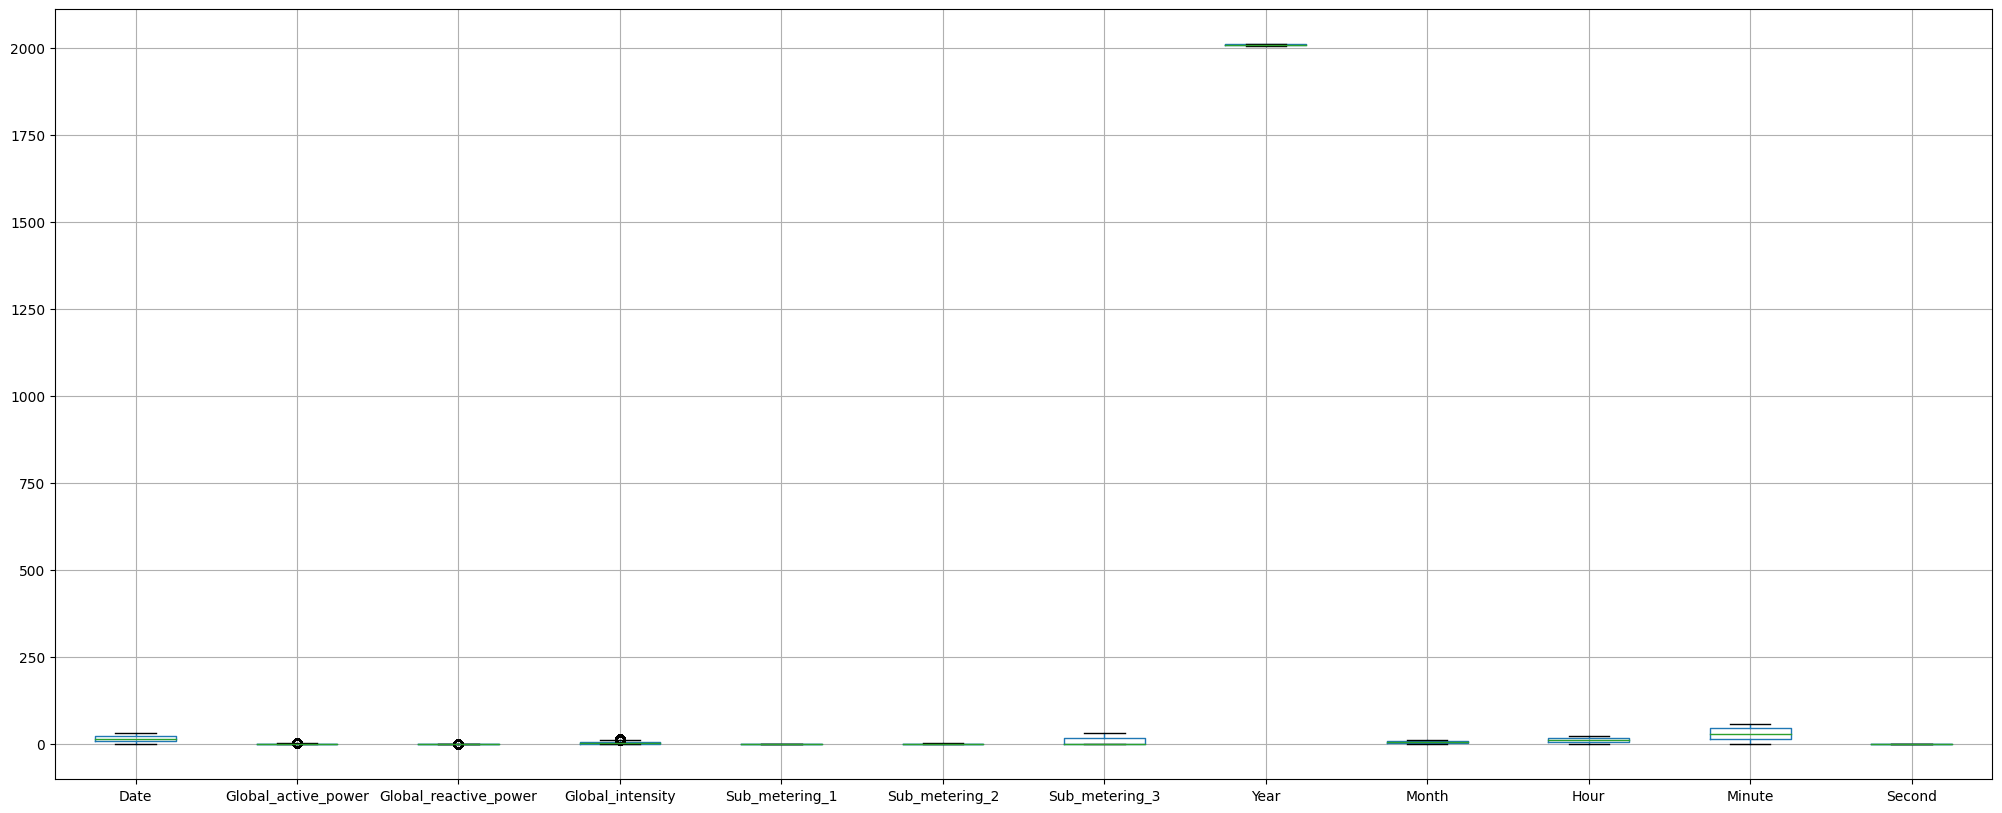

In [29]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

df_features_no_outliers = df_features[(df_features>=lower_bound) & (df_features<=upper_bound)]
df_features_no_outliers = pd.DataFrame(df_features_no_outliers,columns=df_features.columns)
plt.figure(figsize=(25,10))
df_features_no_outliers.boxplot()
plt.show()

### Filling Missng Values

In [30]:
imputer = SimpleImputer()
df_noNaN = imputer.fit_transform(df_features_no_outliers)
df_noNaN = pd.DataFrame(df_noNaN,columns=df_features.columns)

### Standardization

In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_noNaN)
df_scaled = pd.DataFrame(df_scaled,columns=df_features.columns)

In [33]:
df_features_prepared = df_scaled.copy()
df_label_prepared = df_label.copy()

### Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_features_prepared,df_label_prepared,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1660207, 12) (415052, 12)
(1660207, 1) (415052, 1)


### `NOTE:` Data preprocessing for Household power consumption has done for End to End ML project visit: www.github.com/itechdp